In [7]:
import os
import sys

python_working_dir = !pwd
package_path = '/'.join(python_working_dir[0].split('/')[:-1])
print(package_path)

sys.path.append(package_path)

import shap
import pandas as pd
import matplotlib.pyplot as plt

from fraud_prevention import config
from fraud_prevention.evaluation import threshold_table as threshold_table_module
from fraud_prevention.visualization import utils

DATA_PATH = os.path.join(
    config.PRJ_DIR,
    'models/data.parquet')

/Users/luis.sanchez/conekta/project


In [2]:
data = pd.read_parquet(DATA_PATH).query('name == "test"')

(0.0, 250000.0)

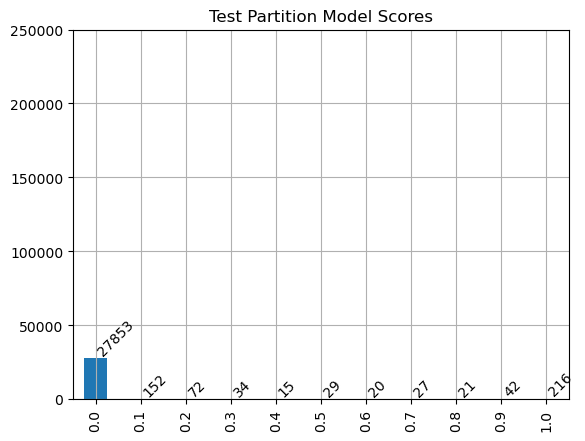

In [3]:
ax = data['y_score'].round(1).value_counts().sort_index().plot(
    kind='bar')

utils.add_bar_values(
    ax=ax)

ax.set_title('Test Partition Model Scores');
ax.set_ylim(0, 250_000)

In [5]:
y_true, y_score = data['y_true'], data['y_score']

threshold_table = threshold_table_module.compute(
    y_true=y_true, 
    y_score=y_score)

Text(0, 0.5, '# Fraud')

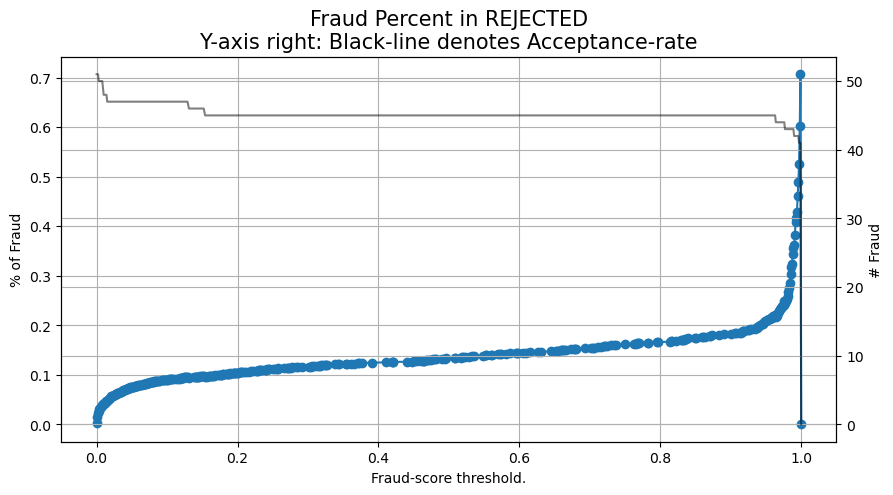

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

threshold_table['rejected_fraud_percent'].plot(
    marker='o',
    grid=True,
    ax=ax)
ax.set_title(
    'Fraud Percent in REJECTED\n'
    'Y-axis right: Black-line denotes Acceptance-rate',
    fontsize=15)

ax.set_xlabel('Fraud-score threshold.')
ax.set_ylabel('% of Fraud')

ax_ = ax.twinx()
threshold_table['rejected_nb_fraud'].plot(
    marker='',
    color='black',
    alpha=.5,
    ax=ax_)

ax_.set_ylabel('# Fraud')